José Eduardo Sánchez Velázquez  Matricula :1946703

In [284]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as num
import glob
import os
import tensorflow as tf

In [2]:
!pip install kaggle
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eduardo1609","key":"b090e3eaec164dcf4b8518ba1e934ee6"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d kaggleashwin/vehicle-type-recognition --force

 92% 146M/159M [00:01<00:00, 118MB/s]
100% 159M/159M [00:01<00:00, 109MB/s]


In [6]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/vehicle-type-recognition.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [16]:
imagenes = []
etiquetas = []

In [18]:
# Ruta de la carpeta principal
carpeta_principal = '/content/Dataset/Dataset'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (28,28), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = num.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1

Subcarpeta: /content/Dataset/Dataset/Truck
/content/Dataset/Dataset/Truck/Image_34.jpg
/content/Dataset/Dataset/Truck/Image_80.jpg
/content/Dataset/Dataset/Truck/Image_38.jpg
/content/Dataset/Dataset/Truck/Image_88.jpg
/content/Dataset/Dataset/Truck/Image_6.jpg
/content/Dataset/Dataset/Truck/Image_2.jpg
/content/Dataset/Dataset/Truck/Image_76.jpg
/content/Dataset/Dataset/Truck/Image_13.jpg
/content/Dataset/Dataset/Truck/Image_7.jpg
/content/Dataset/Dataset/Truck/Image_56.jpg
/content/Dataset/Dataset/Truck/Image_90.jpg
/content/Dataset/Dataset/Truck/Image_92.jpg
/content/Dataset/Dataset/Truck/Image_21.jpg
/content/Dataset/Dataset/Truck/Image_81.jpg
/content/Dataset/Dataset/Truck/Image_65.jpg
/content/Dataset/Dataset/Truck/Image_68.jpg
/content/Dataset/Dataset/Truck/Image_82.jpg
/content/Dataset/Dataset/Truck/Image_26.jpg
/content/Dataset/Dataset/Truck/Image_44.jpg
/content/Dataset/Dataset/Truck/Image_32.jpg
/content/Dataset/Dataset/Truck/Image_35.jpg
/content/Dataset/Dataset/Truck/Image

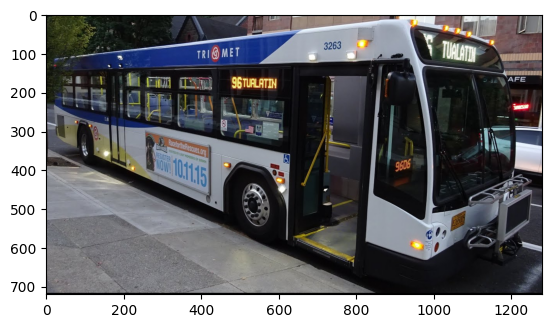

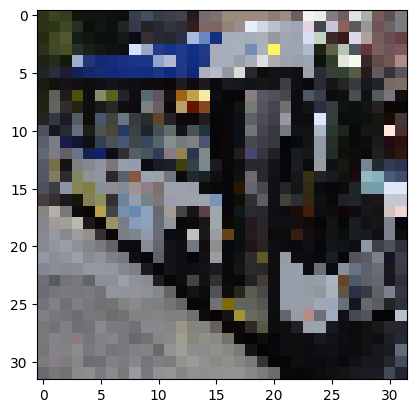

In [177]:
x = '/content/Dataset/Dataset/Bus/Image_23.jpg'
test_image = cv2.imread(x)

# Convierte la imagen a formato RGB
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image_rgb)
plt.show()

# Redimensiona la imagen
img_resized = cv2.resize(test_image, (32, 32))

# Muestra la imagen con el colormap 'viridis' (cualquier colormap en color)
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB), cmap='viridis')
plt.show()




In [178]:
len(imagenes)

400

In [179]:
etiquetas = num.array(etiquetas)

In [180]:
images = num.array(imagenes)

In [181]:
num.shape(images)

(400, 28, 28, 3)

In [148]:
#orden de etiquetas
#Truck=0 Bus=1 Motorcycle=2 Car=3
etiquetas[301]

3

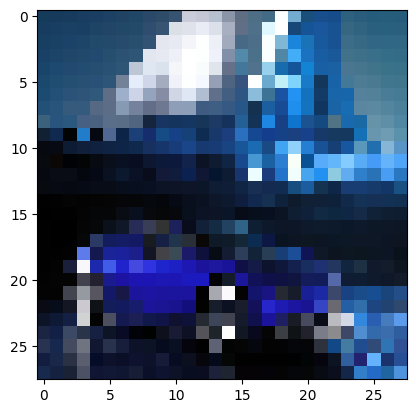

In [149]:
plt.imshow(imagenes[301])

In [150]:
images_train, images_test, labels_train, labels_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [151]:
len(images_train)

320

In [152]:
len(labels_train)

320

In [153]:
len(labels_test)

80

In [154]:
# Parte convolusional de la RNAC

input_shape = (28, 28, 3)
output_size = 4

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(32, activation='relu'))  # Reducing the number of neurons
model.add(Dense(output_size, activation='softmax'))


In [155]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [156]:
# Compliación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [202]:
# Convierte las listas a matrices NumPy
images_train_num = num.array(images_train)
labels_train_num = num.array(labels_train)
images_test_num = num.array(images_test)
labels_test_num = num.array(labels_test)

# Imprimir la forma de las imágenes y las etiquetas en ambos conjuntos
print("Train data shapes:", images_train_num.shape, labels_train_num.shape)
print("Test data shapes:", images_test_num.shape, labels_test_num.shape)


Train data shapes: (320, 28, 28, 3) (320,)
Test data shapes: (80, 28, 28, 3) (80,)


In [200]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define batch size
batch_size = 32

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use datagen.flow() to generate augmented images in real-time during training
train_generator = datagen.flow(images_train_num, labels_train_num, batch_size=batch_size)



In [214]:
from tensorflow.keras.layers import Dropout

# Add dropout layers to your model, for example:
model.add(Dropout(0.5))


In [215]:
from keras.layers import Dense

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [216]:
model.add(Dense(256, activation='relu'))

In [217]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [235]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.02), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [238]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [239]:
history = model.fit(images_train_num, labels_train_num, epochs=10,
                    validation_data=(images_test_num, labels_test_num), batch_size=32)


Epoch 1/10
10/10 [==============================] - 1s 59ms/step - loss: 69.2127 - accuracy: 0.2750 - val_loss: 4.9505 - val_accuracy: 0.3250
Epoch 2/10
10/10 [==============================] - 1s 55ms/step - loss: 2.5700 - accuracy: 0.3000 - val_loss: 1.5257 - val_accuracy: 0.3000
Epoch 3/10
10/10 [==============================] - 1s 71ms/step - loss: 1.3217 - accuracy: 0.4187 - val_loss: 1.3510 - val_accuracy: 0.3875
Epoch 4/10
10/10 [==============================] - 1s 67ms/step - loss: 1.1371 - accuracy: 0.5063 - val_loss: 1.4873 - val_accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 1s 68ms/step - loss: 0.8359 - accuracy: 0.6531 - val_loss: 1.3944 - val_accuracy: 0.4500
Epoch 6/10
10/10 [==============================] - 1s 62ms/step - loss: 0.5636 - accuracy: 0.8156 - val_loss: 1.3918 - val_accuracy: 0.4750
Epoch 7/10
10/10 [==============================] - 0s 46ms/step - loss: 0.3710 - accuracy: 0.8906 - val_loss: 1.5550 - val_accuracy: 0.4500
Epoch 8/10
1

3/3 - 0s - loss: 1.7400 - accuracy: 0.5000 - 40ms/epoch - 13ms/step


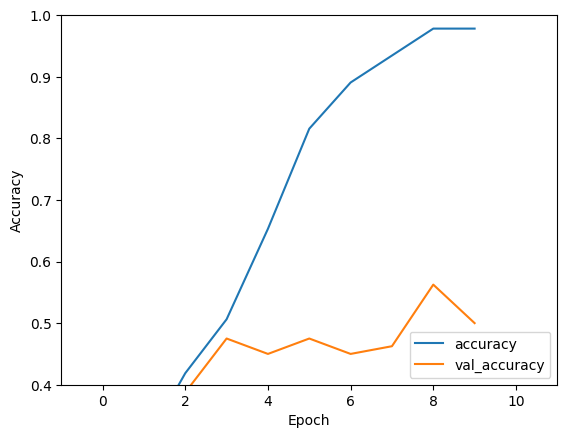

In [240]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test_num, labels_test_num, verbose=2)

In [241]:
predictions = model.predict(images_test_num)

3/3 [==============================] - 0s 10ms/step


In [248]:
x = predictions[10]
y = labels_test_num[10]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))


La red dice que la imagen es clase [0.64643484 0.0916523  0.01380258 0.24811028] y la clase verdadera es: 0


In [250]:
x = predictions[21]
y = labels_test_num[21]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))


La red dice que la imagen es clase [0.9252771  0.06223109 0.011092   0.00139977] y la clase verdadera es: 0


In [258]:
x = predictions[65]
y = labels_test_num[65]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))


La red dice que la imagen es clase [0.6275424  0.00668567 0.13995627 0.22581567] y la clase verdadera es: 0


In [278]:
x = predictions[45]
y = labels_test_num[45]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.12539926 0.01038838 0.01330064 0.8509117 ] y la clase verdadera es: 3


In [283]:
x = predictions[40]
y = labels_test_num[40]
print("La red dice que la imagen es clase " + str(x) + " y la clase verdadera es: " + str(y))

La red dice que la imagen es clase [0.17203778 0.06406925 0.11794765 0.64594525] y la clase verdadera es: 3
